In [14]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

In [15]:
#Load data, when one - hot is true, one array is 1 and the rest are 0
mnist = input_data.read_data_sets('D:/MNIST_data', one_hot=True)

Extracting D:/MNIST_data\train-images-idx3-ubyte.gz
Extracting D:/MNIST_data\train-labels-idx1-ubyte.gz
Extracting D:/MNIST_data\t10k-images-idx3-ubyte.gz
Extracting D:/MNIST_data\t10k-labels-idx1-ubyte.gz


In [16]:
#Set properties
trainNum = 55000 #Number of training samples
testNum = 10000 #Number of testing samples
trainSize = 2000 #Number of pictures used in training
testSize = 1000 #Number of pictures used in testing
k = 4  #Number of pictures close to the sample

In [17]:
#Data decomposes random data and takes trainsize ranges. 0-trainnum replace = false indicates that it is not repeatable
trainIndex = np.random.choice(trainNum, trainSize, replace=False) # Generate random numbers
testIndex = np.random.choice(testNum, testSize, replace=False)
trainData = mnist.train.images[trainIndex]  # Training pictures
trainLabel = mnist.train.labels[trainIndex]  # Training labels
testData = mnist.test.images[testIndex]  # Testing pictures
testLabel = mnist.test.labels[testIndex]  # Testing labels

# Use placeholder to load data
trainDataInput = tf.placeholder(shape=[None, 784], dtype=tf.float32)
trainLabelInput = tf.placeholder(shape=[None, 10], dtype=tf.float32)
testDataInput = tf.placeholder(shape=[None, 784], dtype=tf.float32)
testLabelInput = tf.placeholder(shape=[None, 10], dtype=tf.float32)


In [18]:
#KNN distance
#Dimension extension dimension transformation 5754 -- > 51784
f1 = tf.expand_dims(testDataInput, 1)  
f2 = tf.subtract(trainDataInput, f1)  
f3 = tf.reduce_sum(tf.abs(f2), reduction_indices=2) 
f4 = tf.negative(f3)  
f5, f6 = tf.nn.top_k(f4, k=k)  
f7 = tf.gather(trainLabelInput, f6) 
f8 = tf.reduce_sum(f7, reduction_indices=1) 
f9 = tf.argmax(f8, dimension=1) 

In [19]:
#Detection probability statistics
with tf.Session() as sess:
    p9 = sess.run(f9, feed_dict={trainDataInput: trainData, testDataInput: testData, 
                                 trainLabelInput: trainLabel})
    p10 = np.argmax(testLabel, axis=1)
    print('prediction value:', p9)
print('true value:', p10)

prediction value: [3 1 3 7 6 9 3 3 5 9 1 5 7 3 8 6 4 2 9 1 7 8 8 6 3 4 6 9 9 8 1 1 3 1 1 1 8
 7 7 1 6 7 2 1 3 6 0 7 1 9 7 0 1 4 3 7 1 4 5 8 9 8 7 4 2 1 1 6 0 6 2 4 3 8
 6 4 1 9 1 8 2 1 4 3 1 9 7 9 7 7 1 5 8 1 9 0 9 5 2 2 5 4 7 2 3 9 9 7 4 4 2
 4 8 2 6 7 1 1 6 5 3 6 7 1 5 7 1 4 3 4 9 5 7 5 7 1 1 0 4 3 1 3 5 6 3 4 0 0
 8 3 2 2 1 8 9 6 3 6 4 0 3 3 4 1 6 0 3 6 1 4 8 9 7 2 8 5 5 0 1 9 4 7 1 5 1
 1 0 6 6 1 5 5 7 9 8 5 2 8 0 8 4 1 2 4 0 7 5 1 4 0 2 8 1 9 7 2 7 9 9 9 9 0
 6 7 6 8 4 0 7 4 7 9 1 7 7 2 5 2 6 6 9 1 4 8 7 9 8 2 2 9 2 9 8 4 6 4 4 1 0
 1 1 8 0 1 2 6 1 0 5 9 7 8 6 1 6 2 0 4 6 8 4 7 9 3 7 7 9 3 3 2 2 1 5 8 1 0
 2 0 5 8 8 3 0 0 1 4 2 9 9 3 3 6 2 5 0 6 0 5 6 0 9 2 8 3 3 1 1 1 1 4 1 2 6
 1 4 5 1 6 1 5 6 4 2 5 2 0 7 6 1 9 4 7 1 1 3 2 8 3 6 3 7 2 1 8 2 7 9 9 4 9
 3 3 9 2 4 3 2 4 3 8 0 1 9 8 0 1 2 2 5 1 1 4 0 3 4 2 0 1 5 5 9 6 5 6 9 6 2
 0 7 2 7 0 9 2 0 0 8 3 2 9 1 3 3 0 2 9 0 5 2 7 6 2 0 0 3 2 1 0 7 8 4 1 3 4
 8 5 8 8 0 2 5 0 3 6 5 5 5 1 0 8 7 3 8 1 1 1 0 1 8 3 9 9 9 7 1 5 0 2 5 1 4
 3 1 2 

In [23]:
#print the final accuracy
j = 0
for i in range(0, testSize):
    if p10[i] == p9[i]:
        j += 1
print('accuracy:'+ str(j*100/testSize)+"%")

accuracy:93.2%


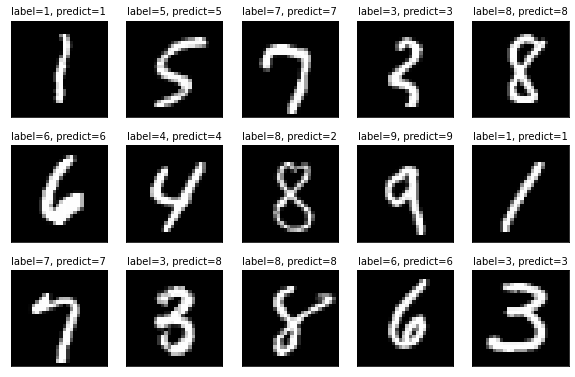

In [21]:
# Define visualization functions
def plot_images_labels_prediction(images, labels, prediction, index, num=10): 
      fig = plt.gcf()   
      fig.set_size_inches(10,6.5)  
      if num > 15:
            num = 15   
      for i in range(0, num):
            ax = plt.subplot(3, 5, i+1) 

            ax.imshow(np.reshape(images[index], (28, 28)), cmap='gray')  

            title = "label=" + str(np.argmax(labels[index]))   
            if len(prediction) > 0:
                  title += ", predict=" + str(prediction[index])

            ax.set_title(title, fontsize=10)
            ax.set_xticks([])  
            ax.set_yticks([])
            index += 1
      plt.show()

plot_images_labels_prediction(testData, testLabel, p9, 10, 25)